# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [32]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [33]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={'metric'}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                          })
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(city_weather)


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nadym
Processing Record 2 of Set 1 | lata
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | vilyuchinsk
Processing Record 9 of Set 1 | nguigmi
Processing Record 10 of Set 1 | ritchie
Processing Record 11 of Set 1 | fale old settlement
Processing Record 12 of Set 1 | nizao
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | mont-laurier
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | peterhead
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | alesund
Processing Rec

In [26]:
city_weather

{'coord': {'lon': -3.6708, 'lat': 16.4145},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 15.41,
  'feels_like': 13.61,
  'temp_min': 15.41,
  'temp_max': 15.41,
  'pressure': 1018,
  'humidity': 23,
  'sea_level': 1018,
  'grnd_level': 987},
 'visibility': 10000,
 'wind': {'speed': 5.05, 'deg': 48, 'gust': 10.34},
 'clouds': {'all': 33},
 'dt': 1706413155,
 'sys': {'country': 'ML', 'sunrise': 1706424368, 'sunset': 1706465318},
 'timezone': 0,
 'id': 2456917,
 'name': 'Goundam',
 'cod': 200}

In [34]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [35]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nadym,65.5333,72.5167,-9.99,94,100,4.02,RU,1706413937
1,lata,40.1629,-8.3327,7.73,88,67,2.13,PT,1706413938
2,jamestown,42.0970,-79.2353,5.01,99,100,2.57,US,1706413938
3,georgetown,5.4112,100.3354,32.19,65,20,3.60,MY,1706413891
4,waitangi,-43.9535,-176.5597,18.23,98,99,7.43,NZ,1706413938


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nadym,65.5333,72.5167,-9.99,94,100,4.02,RU,1706413937
1,lata,40.1629,-8.3327,7.73,88,67,2.13,PT,1706413938
2,jamestown,42.0970,-79.2353,5.01,99,100,2.57,US,1706413938
3,georgetown,5.4112,100.3354,32.19,65,20,3.60,MY,1706413891
4,waitangi,-43.9535,-176.5597,18.23,98,99,7.43,NZ,1706413938


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

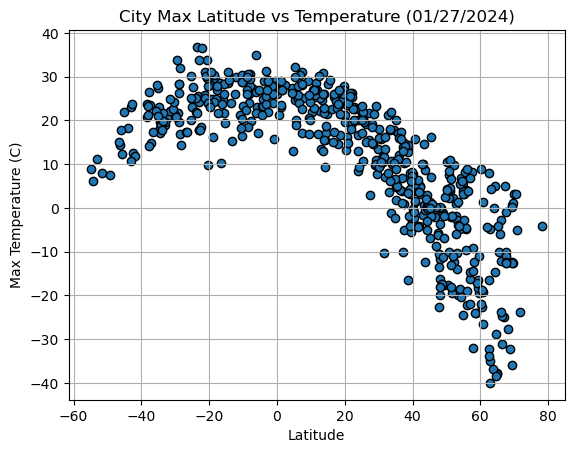

In [39]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', edgecolors='black', s=36, grid=True)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs Temperature (01/27/2024)")
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

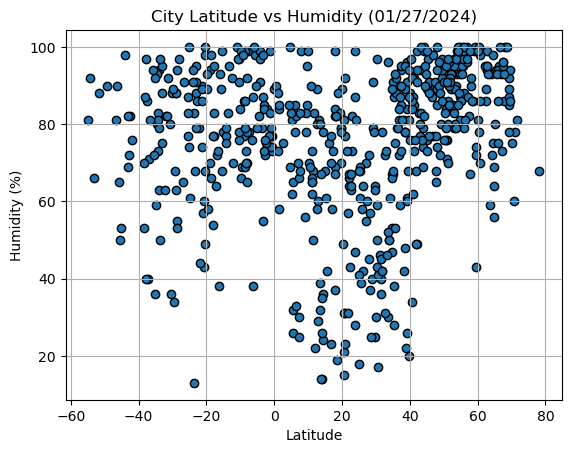

In [40]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', edgecolors='black', s=36, grid=True)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (01/27/2024)")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

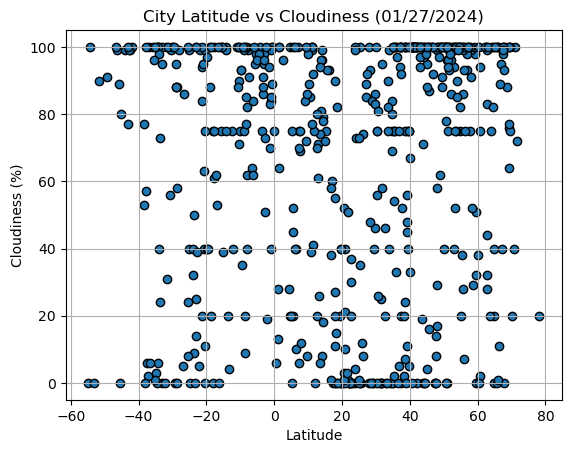

In [41]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', edgecolors='black', s=36, grid=True)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (01/27/2024)")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

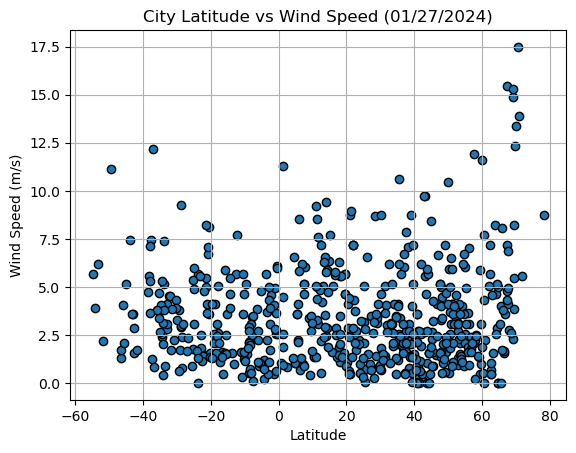

In [42]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', edgecolors='black', s=36, grid=True)


# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (01/27/2024)")
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [90]:
# Define a function to create Linear Regression plots
from scipy import stats
def linregplot(x, y):
    slope, int, r, p, std_err = stats.linregress(x, y)
    print(f"The r-value is {r}")
    fit = slope * x + int
    plt.scatter(x,y)
    plt.plot(x,fit, color='red')
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
    plt.annotate(line_eq,(min(x) + 10,min(y) + 10),fontsize=15,color="red")
    plt.show()
    

The r-value is -0.7408960926631348


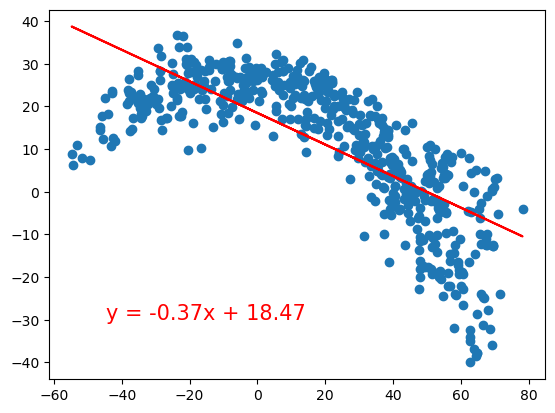

In [91]:
linregplot(city_data_df['Lat'], city_data_df['Max Temp'])

In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nadym,65.5333,72.5167,-9.99,94,100,4.02,RU,1706413937
1,lata,40.1629,-8.3327,7.73,88,67,2.13,PT,1706413938
2,jamestown,42.0970,-79.2353,5.01,99,100,2.57,US,1706413938
3,georgetown,5.4112,100.3354,32.19,65,20,3.60,MY,1706413891
6,kodiak,57.7900,-152.4072,-9.27,67,75,2.06,US,1706413939


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,waitangi,-43.9535,-176.5597,18.23,98,99,7.43,NZ,1706413938
5,saint-philippe,-21.3585,55.7679,25.77,90,94,5.00,RE,1706413939
9,ritchie,-29.0380,24.6028,19.56,63,95,1.71,ZA,1706413940
10,fale old settlement,-9.3852,-171.2468,29.58,69,35,1.52,TK,1706413940
12,blackmans bay,-43.0167,147.3167,23.07,69,77,3.57,AU,1706413941


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8342264122649604


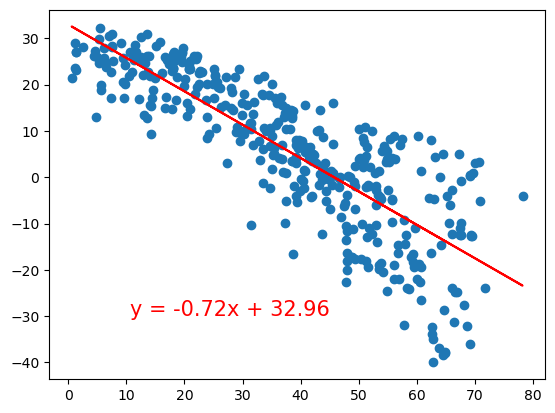

In [92]:
# Linear regression on Northern Hemisphere
linregplot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])


The r-value is 0.5333431954400913


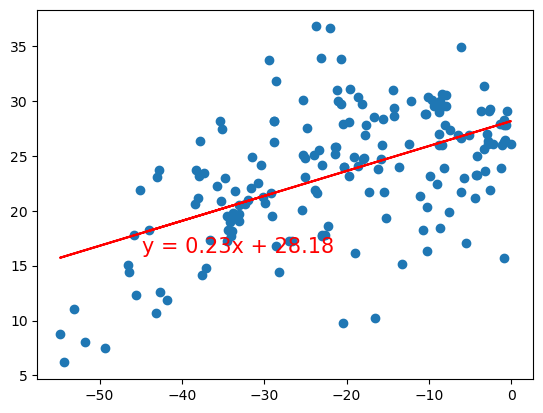

In [93]:
# Linear regression on Southern Hemisphere
linregplot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.44589268385268416


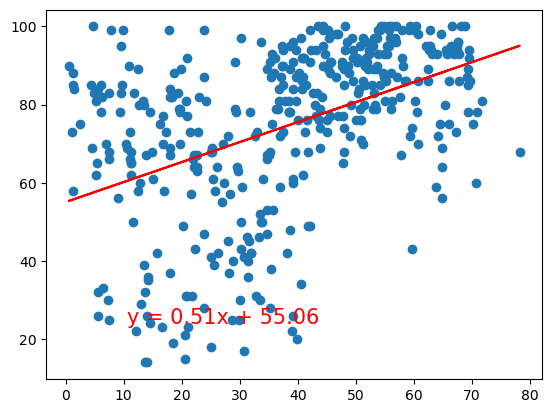

In [94]:
# Northern Hemisphere
linregplot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

The r-value is 0.13929858684121885


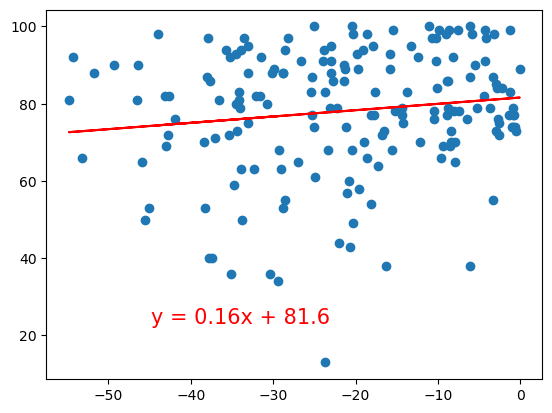

In [95]:
# Southern Hemisphere
linregplot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.2568581085855925


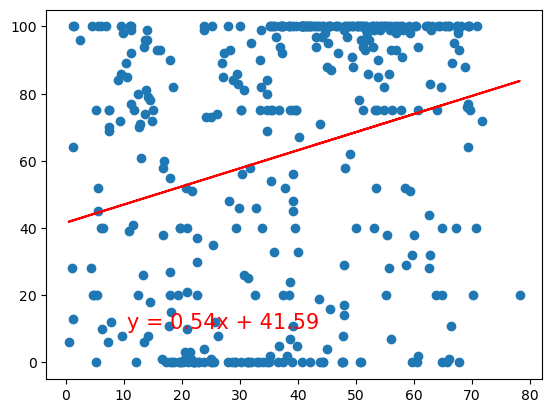

In [96]:
# Northern Hemisphere
linregplot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

The r-value is 0.18071046042914574


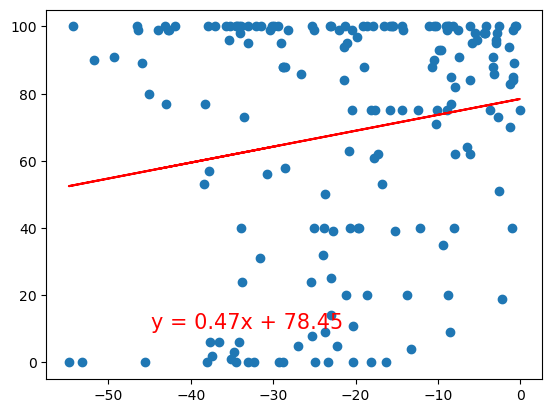

In [97]:
# Southern Hemisphere
linregplot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.10332284115293897


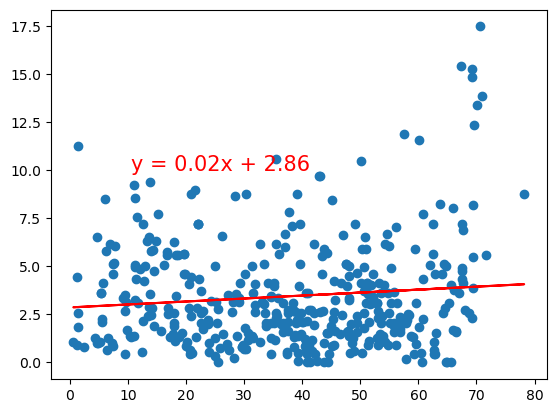

In [98]:
# Northern Hemisphere
linregplot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

The r-value is -0.24162620073753172


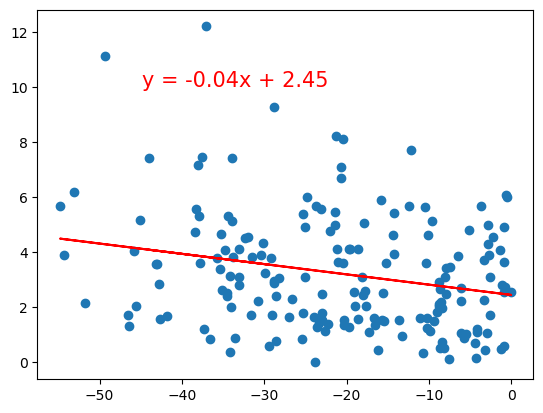

In [99]:
# Southern Hemisphere
linregplot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE